In [1]:
import os
import sys
sys.path.append("..") 

In [2]:
import matplotlib.pyplot as plt
from core.configs import LBMConfig
from core.profiler import Profiler

# Import Benchmarks
from benchmarks.lbm.lbm_numpy import LBMNumPy
from benchmarks.lbm.lbm_cupy import LBMCuPy
from benchmarks.lbm.lbm_cupy_opt import LBMCuPyOpt
from benchmarks.lbm.lbm_jax import LBMJax
from benchmarks.lbm.lbm_warp import LBMWarp
from benchmarks.lbm.lbm_taichi import LBMTaichi


Warp 1.11.1 initialized:
   CUDA Toolkit 12.9, Driver 12.2
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA GeForce GTX 1050" (4 GiB, sm_61, mempool enabled)
   Kernel cache:
     /home/razamoraz/.cache/warp/1.11.1
[Taichi] version 1.7.4, llvm 15.0.4, commit b4b956fd, linux, python 3.12.3


[I 02/04/26 22:40:40.647 11167] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Taichi] Starting on arch=cuda


In [3]:
Np = 64
cfg = LBMConfig(nx=Np, ny=Np, iterations=Np*2, precision="f32")
# solver = LBMNumPy(cfg)
# solver = LBMCuPy(cfg)
# solver = LBMCuPyOpt(cfg)
# solver = LBMJax(cfg)
# solver = LBMWarp(cfg)
solver = LBMTaichi(cfg)



In [4]:
solver.rho.shape

(64, 64)

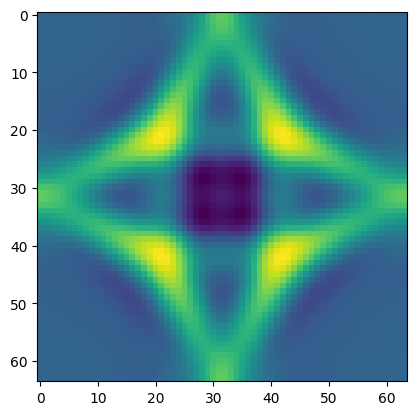

In [9]:
# plt.imshow(solver.rho.get()) # Jax
# plt.imshow(solver.rho.numpy()) # Warp
plt.imshow(solver.rho.to_numpy()) # Taichi


In [8]:
solver.run()